In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_excel('F:\\Data Science\\Data sets\\CocaCola.xlsx')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.shape

(42, 2)

### Visualization

<AxesSubplot:>

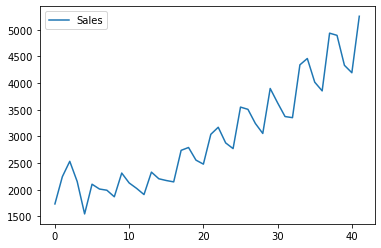

In [6]:
data.plot()

C:\Users\Shriprada\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

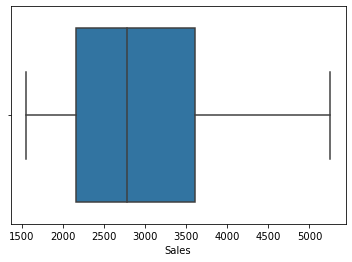

In [7]:
sns.boxplot(data['Sales'])

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

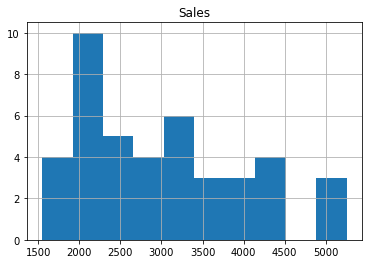

In [8]:
data.hist()

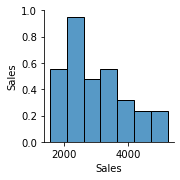

In [9]:
sns.pairplot(data)

<AxesSubplot:ylabel='Density'>

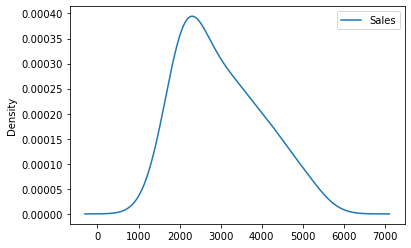

In [10]:
data.plot(kind='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

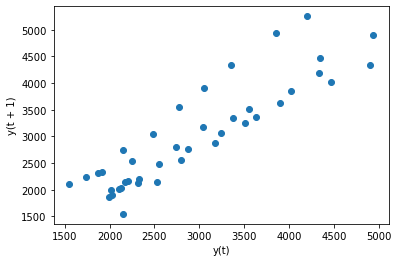

In [11]:
from pandas.plotting import lag_plot
lag_plot(data['Sales'])

#### Data Processing

In [12]:
data['quarter']= 0
for i in range(42):
    p = data['Quarter'][i]
    data['quarter'][i] = p[0:2]

C:\Users\Shriprada\AppData\Local\Temp\ipykernel_8148\4096053193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i] = p[0:2]


In [13]:
data

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [14]:
data['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [15]:
data_dummies = pd.DataFrame(pd.get_dummies(data['quarter']), columns = ['Q1', 'Q2', 'Q3', 'Q4'])
cc = pd.concat([data, data_dummies], axis =1)

In [16]:
data.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [17]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [18]:
cc['t'] = np.arange(1, 43)
cc['t_squared'] = cc['t']**2
cc['Sales_log'] = np.log(data['Sales'])

In [19]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [20]:
train = cc.head(32)
test = cc.tail(10)

<AxesSubplot:>

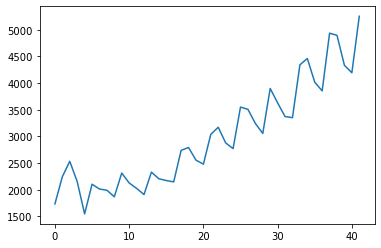

In [21]:
data['Sales'].plot()

### Models

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
linear_model = smf.ols('Sales~t', data = train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']), np.array(linear_pred)))
linear_rmse

752.9233932767121

In [24]:
#Quadratic Model
quad_model = smf.ols('Sales~t+t_squared', data = train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t', 't_squared']]))
quad_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']), np.array(quad_pred)))
quad_rmse

457.7357355407437

In [25]:
#Exponential Model
exp_model = smf.ols('Sales_log~t', data = train).fit()
exp_pred = pd.Series(exp_model.predict(test['t']))
exp_rmse = np.sqrt(mean_squared_error(np.array(test['Sales']), np.array(exp_pred)))
exp_rmse

4387.940544839098

In [26]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_add=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmse_add

1850.4665461858358

In [28]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

673.4432892659163

In [31]:
addquad=smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_squared','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

277.3510771128639

In [32]:
mulsea=smf.ols('Sales_log~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1908.250394836118

In [33]:
mullin= smf.ols('Sales_log~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

448.8678182692097

In [34]:
mul_quad= smf.ols('Sales_log~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

801.9777856535994

In [36]:
Table={'Model':pd.Series(['linear_rmse','quad_rmse','exp_rmse','rmse_add','rmseaddlinear','rmseaddquad','rmsemul','rmsemulin','rmse_mul_quad']),'Values':pd.Series([linear_rmse,quad_rmse,exp_rmse,rmse_add,rmseaddlinear,rmseaddquad,rmsemul,rmsemulin,rmse_mul_quad])}
RMSE_Table=pd.DataFrame(Table)
RMSE_Table

,Model,Values
0,linear_rmse,752.923393
1,quad_rmse,457.735736
2,exp_rmse,4387.940545
3,rmse_add,1850.466546
4,rmseaddlinear,673.443289
5,rmseaddquad,277.351077
6,rmsemul,1908.250395
7,rmsemulin,448.867818
8,rmse_mul_quad,801.977786


In [39]:
final_pred= smf.ols('Sales_log~t+Q1+Q2+Q3+Q4',data=cc).fit()

In [42]:
pred_new = pd.Series(mullin.predict(cc))
pred_new

cc["forecasted_Sales"] = np.exp(pd.Series(pred_new))

cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log,forecasted_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,1581.989196
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,2009.691775
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,1989.007180
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,1851.307210
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,1723.639105
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,2189.637793
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,2167.101118
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,2017.071615
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,1877.972221
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,2385.696019
